# <center>New York Taxi Fare Prediction</center>

![image](new-york-taxi-wallpaper.jpg)

### <center>Overview</center>
* **Basic Idea :**<br>
Analysisng historical data about New York taxi data and getting insights about how taxi fare gets affected by paramters and time.Also machine learning can be used to learn the pattern in data and can be used as a tool for future prediction. 


* **Objective :**<br>Machine learning can be used to detect the pattern in the historical data and can be usefull to create a prediction.Utilizing the Data analysing and Machine Learning to get a idea about possible Fare.<br>


* **Problem Statement :**<br>To predict the Taxi Fare.


* **Motivation :**<br>There are apps like OLA and UBER that gives service of taxi. The app basically shows the fare from given input variables like pickup location and dropping location, number of passenger and the time at which a passenger is booking.so without directly contacting to any taxi , the app calculate the fare using some concept.This concept can be leared from the project.


* **Project Scope :**<br>This  project will analyise the historical data of taxi pricing,take insight from that data to understand more about New York taxi data by the view of pricing.Creating relevent data from already available data is one of the part of the project (Feature Engineering).at the last stage of project will be creating a machine learning model that understand this problem to give us desired output.


* **Working Methodology :**
    - Primary Task is to Understand Data and finding anomalies in data.
    - Feature Engineering.
    - Exploratory data analysis.
    - Machine Learning  Preprocessing.
    - Building Machine Learning model.
    - Model Evaluation.
    - Model validation.
    - Cross validation.
    - Tuning Model.
    
    
* **Data Collection**
    - The dataset I took from kaggle.link for the dataset is [here](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh)


* **Technical Aspect :**<br>
    - [Python v1.2.4](https://www.python.org/) Programming Langauge for this Notebook.
    - [Pandas v1.21.2](https://pandas.pydata.org/) Python Data Analysis Library.
    - [Sklearn v0.24.2](https://scikit-learn.org/stable/) Machine Learning handling in Python.
    - [Geopy v2.2.0](https://pypi.org/project/geopy/) Geocoding Solution for Python. 
    - [Scipy v1.6.3](https://scipy.org/) Scintific Calculation in python
    - [Matplotlib v3.4.2](https://matplotlib.org/) creating static, animated, and interactive visualizations in Python.
    - [Seaborn v0.11.1](https://seaborn.pydata.org/) Python data Visulization based on matplotlib.
    - [Statsmodels 0.12.2](https://www.statsmodels.org/stable/index.html) # Statsmodels is another machine learning library for python.
    
    
- **Model Evaluation Based criteria**
    
   |Criteria|Formula|
   |--------|-------|
   |Coefficent of Determination$R^2$| $$1-\frac{RSS}{TSS}$$ |
   |RMSE|$$\sqrt{\frac{1}{n}\Sigma_{i=1}^{n}(y_i – \hat{y_{i}})^2}$$|
   
   


        


## <center>Index</center>

* [**Data Preprocessing**](#Data-Preprocessing)
    * [Prerequisite](#Prerequisite)
    * [Null Check](#Null-Check)
* [**EDA And Visulization**](#EDA-And-Visulization)
* [**Feature Engineering**](#Feature-Engineering)
* [**Machine Learning Models**](#Machine-Learning-Models)
    * [Model Preprocessing](#Model-Preprocessing)
    * [Models Building](#Models-Building)


### <center>Data Preprocessing</center>

#### Prerequisite

In [2]:
## Installing Prerequisites
#!pip install pandas
#!pip install numpy
#pip install matplotlib
#pip install seaborn
#pip install scipy
#!pip install statmodels    # For OLS model

In [3]:
# Libraries For data Handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Machine Learning Libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE # For feature selection


#Default parameters by notebook

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size']=12
plt.style.use('seaborn-darkgrid')
palette=sns.color_palette('husl',10)


In [4]:
# Getting Data by Pandas
data=pd.read_csv('TaxiFare.csv')
data.drop('unique_id',axis=1,inplace=True)
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


#### Null Check

In [5]:
data.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

### <font color=red>EDA And Visulization

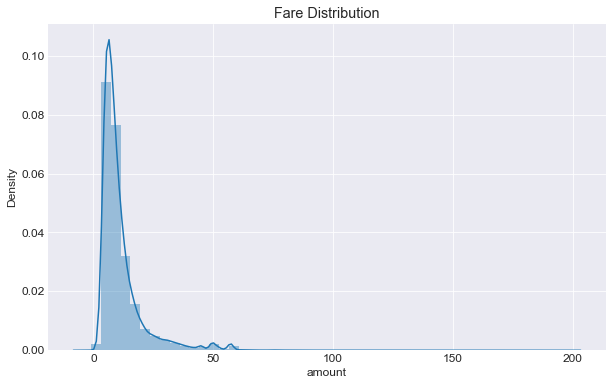

In [6]:

sns.distplot(data['amount'],kde=True)
plt.title('Fare Distribution')
plt.show()

<AxesSubplot:xlabel='amount', ylabel='Density'>

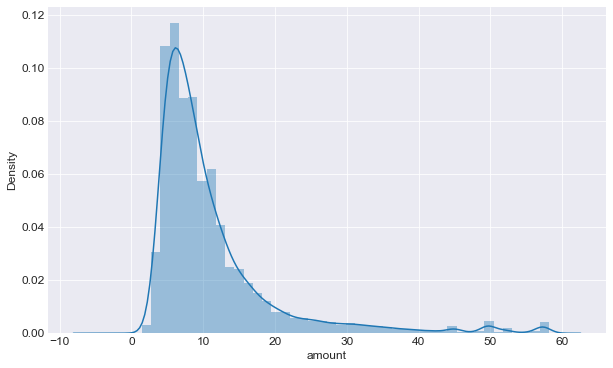

In [7]:

plot_data=data[data.amount<60].amount
sns.distplot(plot_data)

In [8]:
data['fare-bin'] = pd.cut(data['amount'], bins = list(range(0, 50, 5)), include_lowest=True).astype('str')
# Uppermost bin
data['fare-bin'] = data['fare-bin'].replace(np.nan, '[45+]')
data['fare-bin'] = data['fare-bin'].replace('nan', '[45+]')
# apply this to clean up the first bin's label
data['fare-bin'] = data['fare-bin'].apply(lambda x: x.replace('-0.001', '0'))
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,fare-bin
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5.0]"
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15.0, 20.0]"
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"(5.0, 10.0]"
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,"(5.0, 10.0]"
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,"(5.0, 10.0]"


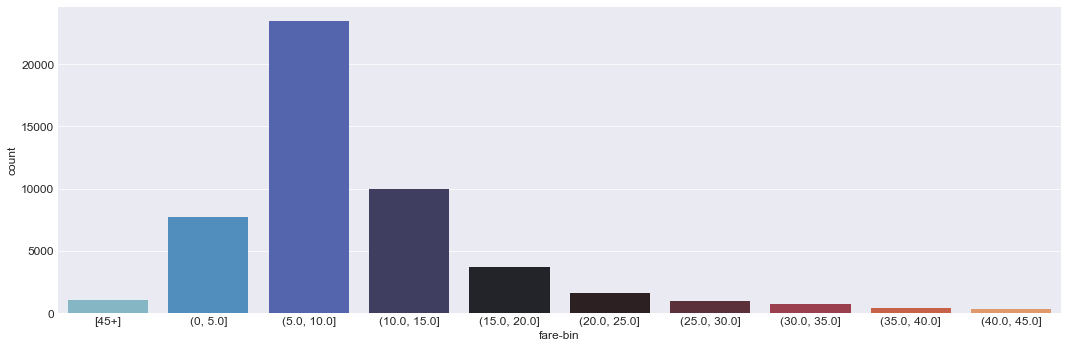

In [9]:
# sort by fare the correct look in the chart
data = data.sort_values(by='amount')
sns.catplot(x="fare-bin", kind="count", palette= "icefire", data=data, height=5, aspect=3);
sns.despine()
plt.show()

In [10]:
# pickup_datetime feature

def create_date_time_feature(df):
    time_column = "date_time_of_pickup"
    df.index = pd.to_datetime(df[time_column])
    df["dow"] = df.index.weekday
    df["hour"] = df.index.hour
    df["month"] = df.index.month
    df["year"] = df.index.year
    return df.reset_index(drop=True)

In [11]:
data = create_date_time_feature(data)
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,fare-bin,dow,hour,month,year
0,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1,[45+],0,10,3,2015
1,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4,[45+],4,8,8,2013
2,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1,[45+],1,23,3,2010
3,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1,[45+],3,15,4,2015
4,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1,[45+],6,5,3,2015


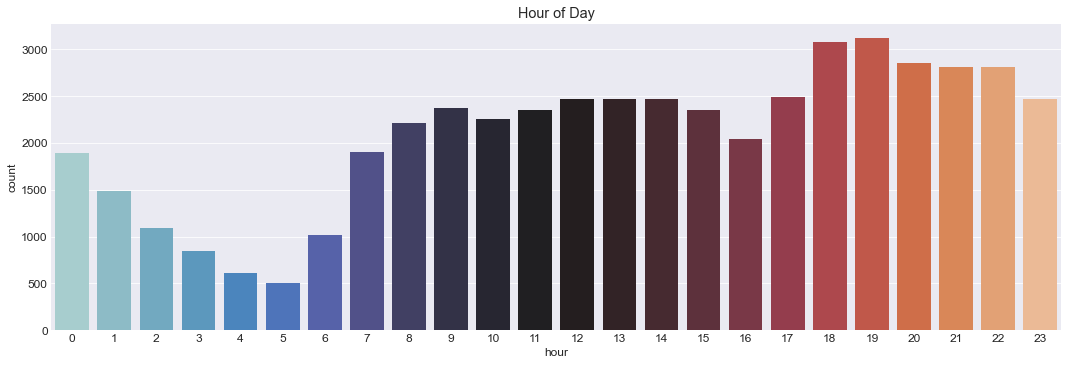

In [12]:
# taxi trip repartition by hour of the day

sns.catplot(x="hour", kind="count", palette="icefire", data=data, height=5, aspect=3);
sns.despine()
plt.title('Hour of Day');
plt.show()

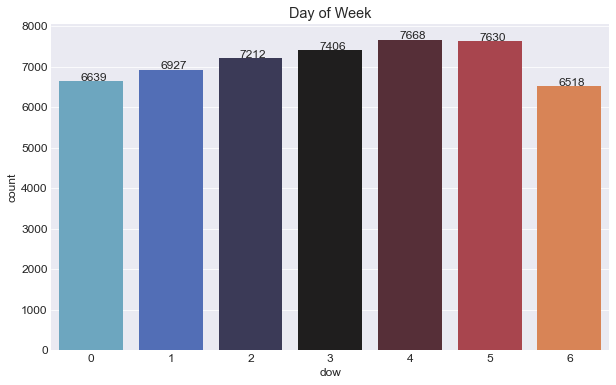

In [13]:
# taxi trip repartition by day of the week

ax=sns.countplot(x="dow", palette="icefire", data=data)
sns.despine()
plt.title('Day of Week')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
    (bar.get_x()+bar.get_width()/3,bar.get_height()+10))


- As 0 represent sunday and 6 is saturday,plot shows less trips count on weekend days.
- weekdays shows more trip counts as are working days.

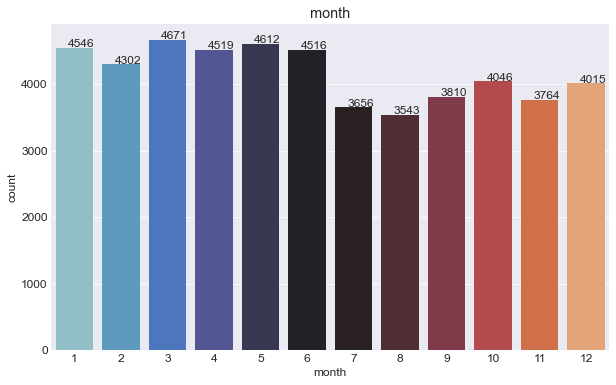

In [14]:
# count of trips monthly distributed.
ax=sns.countplot(x="month", palette="icefire", data=data)
sns.despine()
plt.title('month')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
    (bar.get_x()+bar.get_width()/3,bar.get_height()+10))

<AxesSubplot:>

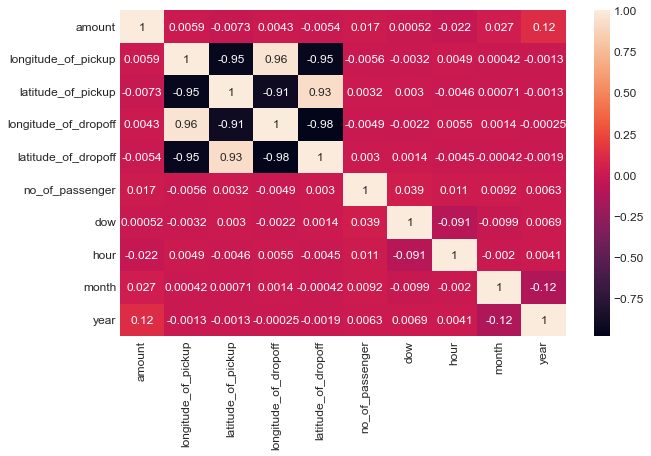

In [15]:
# Corealtion of Variable.
cor=data.corr()
sns.heatmap(cor,annot=True)

In [16]:
# Checking data.
data.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,fare-bin,dow,hour,month,year
0,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1,[45+],0,10,3,2015
1,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4,[45+],4,8,8,2013
2,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1,[45+],1,23,3,2010
3,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1,[45+],3,15,4,2015
4,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1,[45+],6,5,3,2015


In [17]:
# Data Discription.
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dow,hour,month,year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,3.029980,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.956936,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,1.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,3.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,5.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,6.000000,23.000000,12.000000,2015.000000


### <center>Feature Engineering</center>

In [18]:
# Preprocessing Dataset:
df=data.copy() # creating a copy of dataset for further changes to apply on a copy .
df=df.drop(['date_time_of_pickup','fare-bin'],axis=1) #Dropping columns as new Features created from that columns.

df = df.dropna(how='any', axis='rows') # Dropping all Null values.
df = df[(df.latitude_of_dropoff != 0) | (df.longitude_of_dropoff != 0)]# Dropping false values .
df = df[(df.latitude_of_pickup != 0) | (df.longitude_of_pickup != 0)] # Dropping false values .
df = df[df.no_of_passenger < 8] # Dropping false values as no more passengers should be in taxi than 8.
df = df[df.no_of_passenger > 0] # Dropping false values as if no passengers are there so fare not valid.
df = df[df["latitude_of_pickup"].between(left=40, right=42)] # Fixing Range of new-york city
df = df[df["longitude_of_pickup"].between(left=-74.3, right=-72.9)] # Fixing Range of new-york city
df = df[df["latitude_of_dropoff"].between(left=40, right=42)] # Fixing Range of new-york city
df = df[df["longitude_of_dropoff"].between(left=-74, right=-72.9)] # Fixing Range of new-york city
df = df[df.amount <= 200] #Removing outliers in FARE  
df = df[df.amount > 0] #Removing outliers in FARE


In [19]:
# Counting difference in data.
print('original data count:',len(data))
print('cleaned data count:',len(df))

original data count: 50000
cleaned data count: 42383


In [20]:
# Shuffling data
df=df.sample(frac=1)
df.reset_index(drop=True,inplace=True)

In [21]:
#Vectorized version of the haversine distance 
#Computes distance in kms

def haversine_distance(df,
                       start_lat="start_lat",
                       start_lon="start_lon",
                       end_lat="end_lat",
                       end_lon="end_lon"):
    


    lat_1_rad, lon_1_rad = np.radians(df[start_lat].astype(float)), np.radians(df[start_lon].astype(float))
    lat_2_rad, lon_2_rad = np.radians(df[end_lat].astype(float)), np.radians(df[end_lon].astype(float))
    dlon = lon_2_rad - lon_1_rad
    dlat = lat_2_rad - lat_1_rad

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat_1_rad) * np.cos(lat_2_rad) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    haversine_distance = 6371 * c
    return haversine_distance



In [22]:
# Creating distance feature from Cordinates
df["distance"] = haversine_distance(df, 
                                      start_lat="latitude_of_pickup", start_lon="longitude_of_pickup",
                                      end_lat="latitude_of_dropoff", end_lon="longitude_of_dropoff"
                                     )

In [23]:
# Creating Copy of data.
data1=df.copy()
#Drop unwanted columns like the coordinates and the year column .
data1=data1.drop([data1.columns[1],data1.columns[2],data1.columns[3],data1.columns[4],data1.columns[9]],axis=1)
# Check Data
data1.head()

,amount,no_of_passenger,dow,hour,month,distance
0,9.70,1,1,18,7,2.120179
1,42.04,1,1,10,5,8.066146
2,5.00,1,6,0,8,0.640944
3,16.00,2,4,20,1,5.329908
4,7.30,1,2,10,6,2.149592


In [24]:
# Change hours categories

interval = [0,4,8,12,16,20,24]
names = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
data1['hour'] = pd.cut(data1['hour'], bins=interval, labels=names, include_lowest=True)

# Change month to seasons
def getSeason(month):
    if (month == 12 or month == 1 or month == 2 or month == 3):
       return "WINTER"
    elif(month == 4 or month == 5):
       return "SPRING"
    elif(month == 6 or month== 7 or month == 8 or month == 9):
       return "SUMMER"
    else:
       return "FALL"


In [25]:
data1.month=data1.month.apply(getSeason)
data1.head()

,amount,no_of_passenger,dow,hour,month,distance
0,9.70,1,1,Eve,SUMMER,2.120179
1,42.04,1,1,Morning,SPRING,8.066146
2,5.00,1,6,Late Night,SUMMER,0.640944
3,16.00,2,4,Eve,WINTER,5.329908
4,7.30,1,2,Morning,SUMMER,2.149592


In [26]:
data1['dow']=data1['dow'].astype('object')
data1=pd.get_dummies(data1)
data1.head()

,amount,no_of_passenger,distance,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,hour_Late Night,hour_Early Morning,hour_Morning,hour_Noon,hour_Eve,hour_Night,month_FALL,month_SPRING,month_SUMMER,month_WINTER
0,9.70,1,2.120179,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,42.04,1,8.066146,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,5.00,1,0.640944,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,16.00,2,5.329908,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,7.30,1,2.149592,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### <center>Machine Learning Models</center>

#### Model Preprocessing

In [27]:
x=data1.drop('amount',axis=1)
y=data1.amount

#### Model Building

In [28]:
def model_performance(x,y,scaler,itr):
    if scaler=='minmax':
        scaler=MinMaxScaler()
    elif scaler=='standerd':
        scaler=StandardScaler()
    x_scale=scaler.fit_transform(x)

    train_x,test_x,train_y,test_y=train_test_split(x_scale,y,test_size=0.30)

    model1=RandomForestRegressor(n_estimators=itr,max_depth=10,n_jobs=-1).fit(train_x,train_y)
    pred1=model1.predict(test_x)

    model2=LinearRegression().fit(train_x,train_y)
    pred2=model2.predict(test_x)

    rf_rmse=np.sqrt(mean_squared_error(test_y,pred1))
    linear=np.sqrt(mean_squared_error(test_y,pred2))


    return (model1,print(f"Result:\n\tTest Rmse by random forest regression:{rf_rmse}\n\tTest RMSE by Linear regression:{linear}"))


In [29]:
model1=model_performance(x,y,'minmax',200)

Result:
	Test Rmse by random forest regression:4.822590544412908
	Test RMSE by Linear regression:6.401495168042977


In [30]:
model2=model_performance(x,y,'standerd',200)

Result:
	Test Rmse by random forest regression:4.661796413815889
	Test RMSE by Linear regression:5.453633066493117


In [31]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

train_x,test_x,train_y,test_y=train_test_split(x_scale,y,test_size=0.30)

# Model with Hyperparameters tuning.
# create an instance of the RandomForestRegressor class
clf = RandomForestRegressor()
# build the Hyperparameters
params = {"criterion":[ "mse"],
 "max_depth": np.arange(2,4),
 "min_samples_leaf":np.arange(2,5),
 "min_samples_split":np.arange(2,5),
 "max_features":['auto','sqrt']
 }

# run the GridSearch CV
grid = GridSearchCV(clf,param_grid=params,scoring='r2',cv=10,n_jobs=-1).fit(train_x,train_y)

In [32]:
# best parameters from Gridsearch :
bp=grid.best_params_

In [33]:
# scaling data:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

train_x,test_x,train_y,test_y=train_test_split(x_scale,y,test_size=0.30)

In [34]:
# Model on Best parameters :
itr=200
model=RandomForestRegressor(n_estimators=itr,criterion=bp['criterion'],max_depth=bp['max_depth'],max_features=bp['max_features'],
                            min_samples_leaf=bp['min_samples_leaf'],min_samples_split=bp['min_samples_split'],n_jobs=-1).fit(train_x,train_y)
pred1=model.predict(test_x)

rf_rmse=np.sqrt(mean_squared_error(test_y,pred1))

print("Result:\n\tTest Rmse by random forest regression: {:.3f}".format(rf_rmse))


Result:
	Test Rmse by random forest regression: 4.863
